Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: .\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: .\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: .\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: .\models\buffalo_l\genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: .\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


True

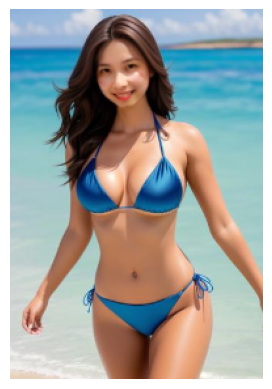

In [2]:
from matplotlib import pyplot as plt
import cv2
import insightface

def draw_on_fixed(self, img, faces):
    dimg = img.copy()
    for i in range(len(faces)):
        face = faces[i]
        box = face.bbox.astype(int) 
        color = (0, 0, 255)
        cv2.rectangle(dimg, (box[0], box[1]), (box[2], box[3]), color, 2)
    return dimg

insightface.app.FaceAnalysis.draw_on = draw_on_fixed

providers = ["CPUE  xecutionProvider"]

target_frame = cv2.imread('imgs/test4.png')
src_frame = cv2.imread('imgs/test3.png')

FACE_ANALYSER = insightface.app.FaceAnalysis(
                    name="buffalo_l",
                    root=".", 
                    providers=providers,
                    allowed_modules=["landmark_3d_68", "landmark_2d_106", "detection", "recognition"]
                )
FACE_ANALYSER.prepare(
                ctx_id=0,
                det_size=(640, 640),
            )

src_faces = FACE_ANALYSER.get(src_frame)[-1] 

target_faces = FACE_ANALYSER.get(target_frame)

model_path = './models/inswapper_128.onnx'
model_swap_insightface = insightface.model_zoo.get_model(model_path, providers=providers)

img_fake = model_swap_insightface.get(img=target_frame, target_face=target_faces[0], source_face=src_faces, paste_back=True)

plt.imshow(cv2.cvtColor(img_fake, cv2.COLOR_BGR2RGB))
plt.axis('off') 
cv2.imwrite('result.jpg',img_fake)
